# Exercise 2.2 – Choose one of the following situations, write down mean field model equations and analyze them with this lesson’s tools.
### World War Z
A highly contagious virus emerges. It infects humans and is transmitted through direct contact between infected and
susceptible individuals. The incubation time is 8 seconds. Very few individuals are immune to the infection. This allows to synthesize a “vaccine” that cures the disease. Vaccinated individuals are no longer infective, but the time between
application of the vaccine and recovery is one day. The vaccine becomes available only D days after the epidemics has started, and a fixed number V of individuals can be vaccinated per day.

* Given some sensible parameters for disease spread consistent with the initial conditions, calculate the minimum D for humankind to win the war. ( Hint: A population of size N <1 can be considered extinct).
* Estimate the time to revert the zombie condition as a function of D and V.
<br><br>

\begin{split}\begin{aligned}
\frac{dS}{dt} & = - \frac{\beta I S}{N}\\
\frac{dE}{dt} & = \frac{\beta I S}{N} - \alpha E\\ 
\frac{dI}{dt} & = \alpha E - \frac{\mu I S}{N}\\
\frac{dR}{dt} & = \frac{\mu I S}{N}\\
\end{aligned}\end{split}
<br>

This model could be formed by four different compartments (Susceptibles, Exposed, Infective, Recovered) represented by a set of differential equations. The number of individuals in each different compartment will be absolute, not relative, being *N* the total population size. In order for a transition to occur between Susceptible and Exposed, and between Infective and Recovered, a direct interation between infeceted and susceptible individuals is required. I considered necessary that healthy individuals apply the vaccine to the infected ones.

Since the incubation time is just 8 seconds, we can ignore exposed individuals in order to make the model simpler and lighter to compute. Moreover, we could include the period after which the vaccine becomes available (*D* days) using a conditional argument as follows: <br><br>

\begin{split}\begin{aligned}
\ & for  (t < D):\\
\frac{dS}{dt} & = - \frac{\beta I S}{N}\\
\frac{dI}{dt} & = \frac{\beta I S}{N}\\
\end{aligned}\end{split}



\begin{split}\begin{aligned}
\ & for  (t >= D):\\
\frac{dS}{dt} & = - \frac{\beta I S}{N}\\
\frac{dI}{dt} & = \frac{\beta I S}{N} - \frac{\mu I S}{N}\\
\frac{dR}{dt} & = \frac{\mu I S}{N}\\
\end{aligned}\end{split}
<br>

Finally, we want to limit the rate at which infected individuals get vaccinated by healthy people, establishing a maximum number of vaccines that can be administered per day (*V*). To do this, we first need to know that vaccinations are modelled as interaction between Infective and Susceptible individuals (normalizad by *N* total population). This interaction reaches it maximum value when *I* = *S* = *N*/2, so that the maximum number of vaccinations would be *I* * *S* = *N*/4. We can then customize the maximum number of vaccinations per day, which will be achieved when *I* = *S*, normalizing *S* * *I* interaction (dividing it by *N*/4) and multiplying it by *V*.<br><br>

\begin{split}\begin{aligned}
\ & for  (t >= D):\\
\frac{dS}{dt} & = - \frac{\beta I S}{N}\\
\frac{dI}{dt} & = \frac{\beta I S}{N} - \frac{\mu I S}{N} \frac{V}{N/4}\\
\frac{dR}{dt} & = \frac{\mu I S}{N} \frac{V}{N/4}\\
\end{aligned}\end{split}
<br>


#### Fixed parameters and variables

* Infection rate (beta) = 0.5   <br>
I considered that when a healthy individual meets an infected, there are equal probabilities for the susceptible to either get infected by the zombie or to kill the infective individual and remain alive. <br><br>

* Recovery rate (mu) = 1    <br>
Since the recovery period is just one day, there are 100% chances that a vaccinated indivdual recovers 1 day after vaccination. Recovery rate = 1/recovery period.<br><br>

* Total population (N) = 1.000  <br>
I fixed a total population of 1000 individuals, in which the initial conditions por each compartment are as follows: S = 999, I = 1, R = 0.<br><br>

* Maximum vaccinations per day (V)<br>
For exercise 1, I considered V = 250. This means that when S = I = 500, half of the infected individuals will be vaccinated, and this vaccination rate will decrease when S and I compartment sizes become more and more unequal.<br><br>
* Days before vaccine is developed (D)<br><br>

In [131]:
import numpy as np

# Define SIR differential equations
def mySIR(t, sir, beta, mu, N, V, D):
	
	s, i, r = sir
	
	if t < D:
		dsdt = - (beta*i*s)/N			# dS/dt
		didt = (beta*s*i)/N				# dI/dt
		drdt = 0                   		# dR/dt
	else:
		dsdt = - (beta*i*s)/N           # dS/dt
		didt = (beta*s*i)/N - (mu*i*s)/N * V/(N/4)			# dI/dt
		drdt = (mu*i*s)/N * V/(N/4)                   		# dR/dt
		
	return np.array([dsdt, didt, drdt])

In [136]:
# Define SIR initial values and fixed parameters
pop_N = 1000                # Total population size
sir_0 = [999, 1, 0]         # Initial SIR conditions

recovery_time = 1                   # Recovery period (days)
beta = 0.5                      	# Transmission rate
mu = 1/recovery_time                # Recovery rate

max_V = 250                         # Maximum number of vaccinations per day
days_D = list(range(10,16))         # Days before vaccine is developed

interval = [0, 100]             # Days
timesteps = 100

First, I will try to identify the maximum number of days that should pass before a vaccine is developed in order to guarantee humankind survival.

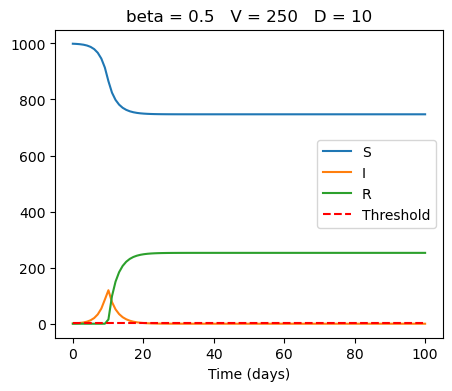

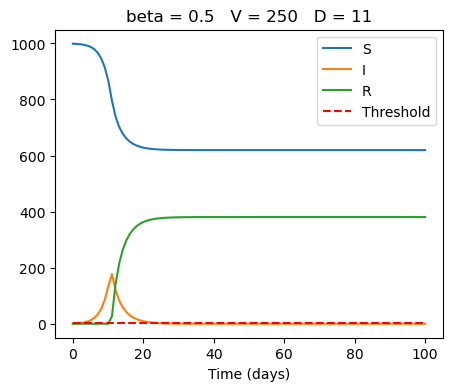

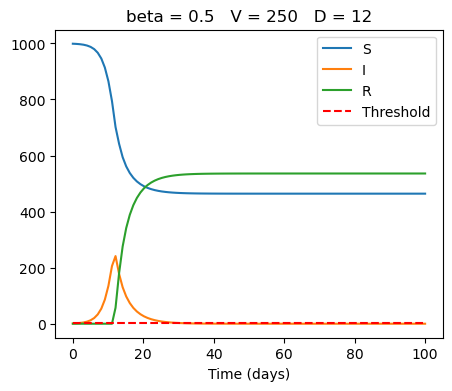

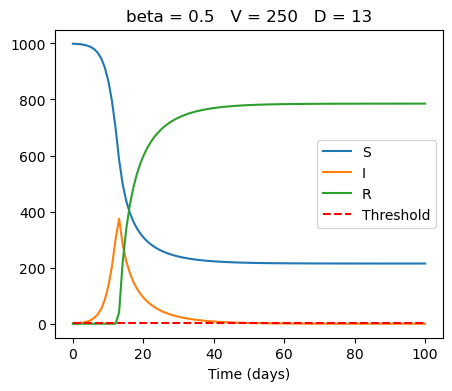

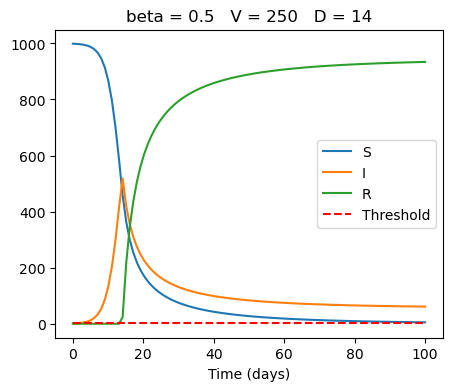

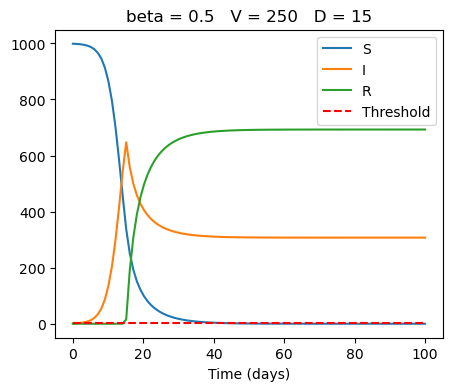

In [138]:
from scipy.integrate import *
import matplotlib.pyplot as plt

for day_D in days_D:
    sir_int = solve_ivp(fun = mySIR, t_span = interval, y0 = sir_0, args = (beta, mu, pop_N, max_V, day_D), t_eval = np.linspace(interval[0],interval[1], timesteps))
    sir_int.y

    # Plot the curves
    fig, ax = plt.subplots(dpi = 100, figsize = (5,4))
    curves = ax.plot(sir_int.t, sir_int.y.T, label = ['S', 'I', 'R'])
    threshold = ax.plot(sir_int.t, [1]*len(sir_int.t), "r--", label = "Threshold")
    ax.set_title("beta = {}   V = {}   D = {}".format(beta, max_V, day_D))
    ax.set_xlabel("Time (days)")
    ax.legend()

For this initial conditions, the maximum number of days to develop a vaccine should be 13 for humankind to survive. If vaccine is not developed by day 13, humankind will become extint.

Now, I will represent how the time to revert the zombie condition varies as a function of D and V.

C:\Users\adrib\AppData\Local\Temp\ipykernel_31148\2189930102.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(dpi = 100, figsize = (5,4))


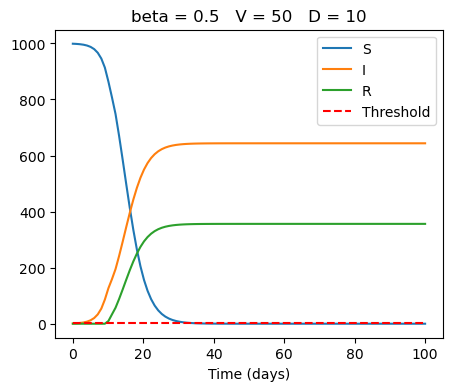

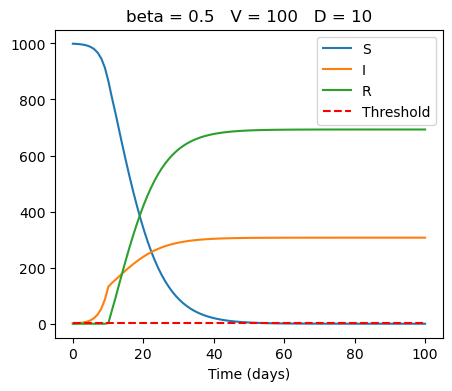

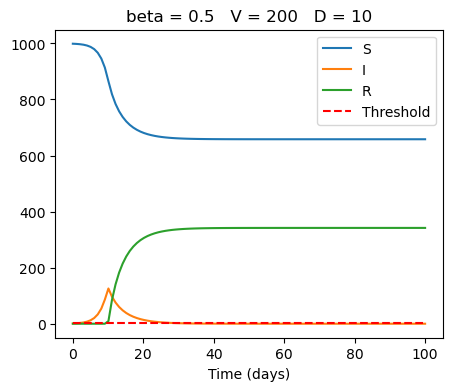

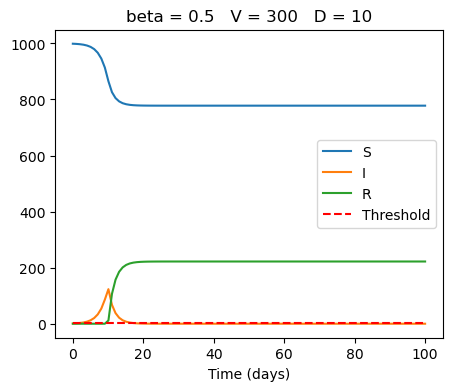

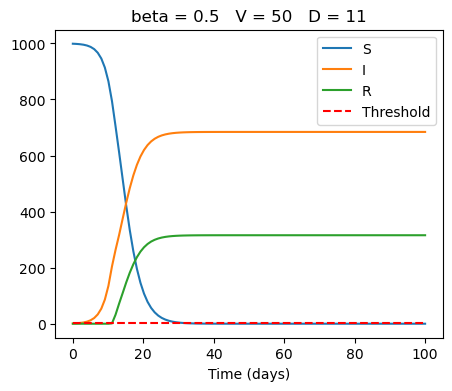

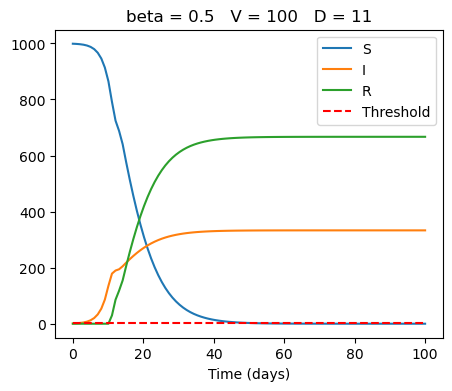

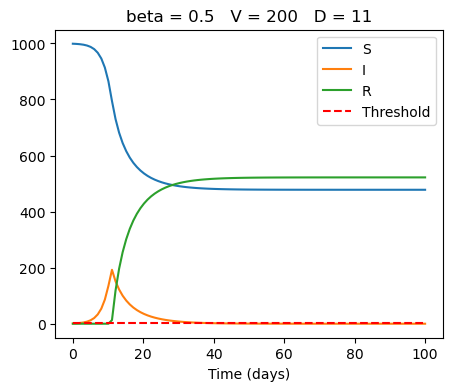

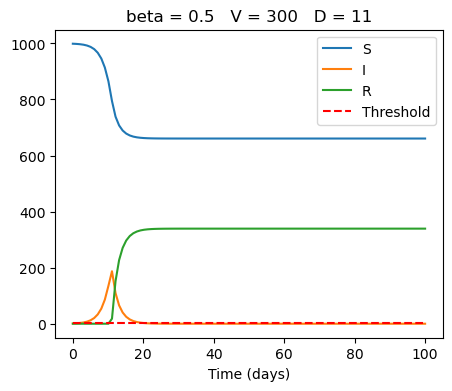

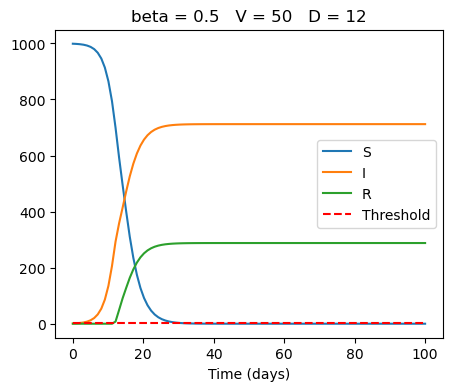

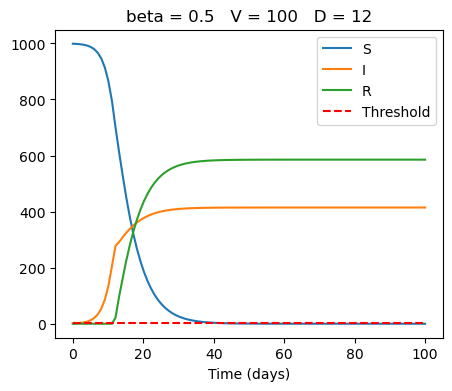

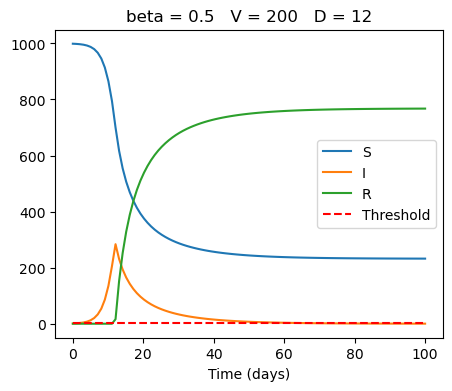

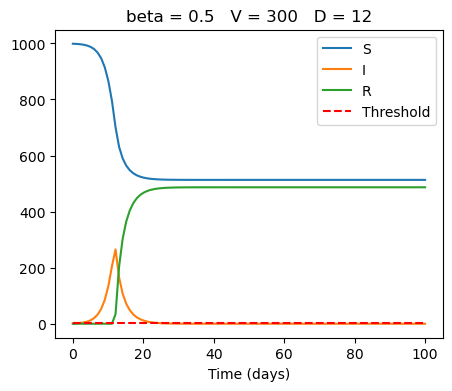

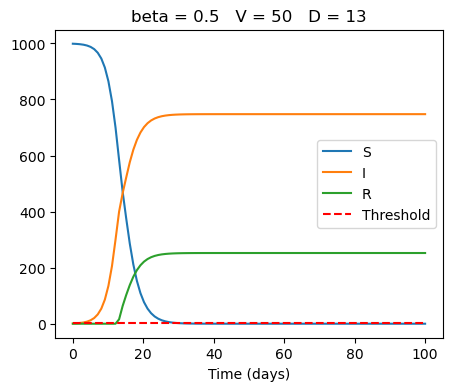

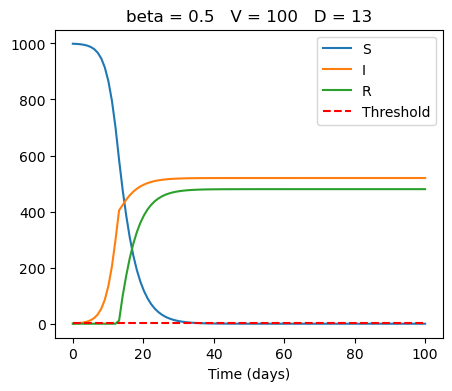

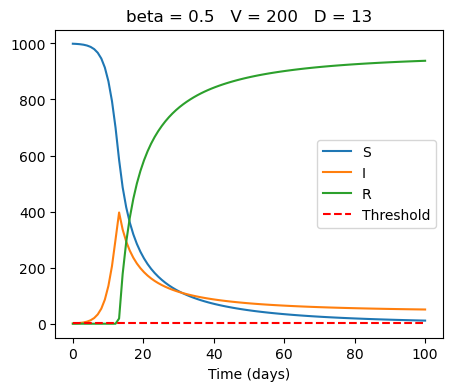

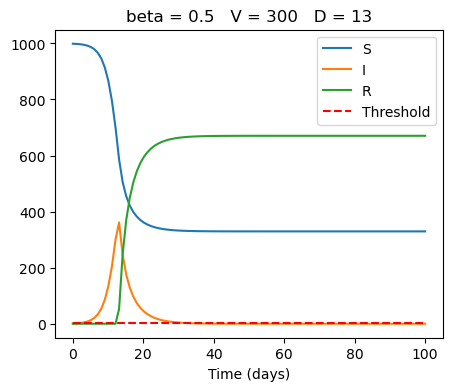

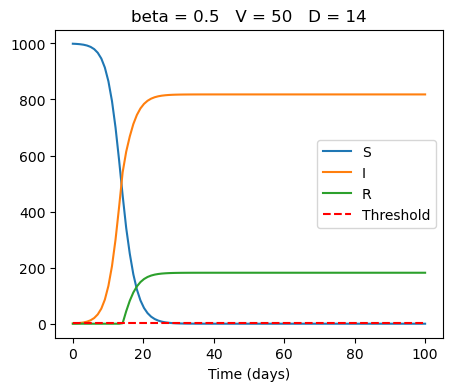

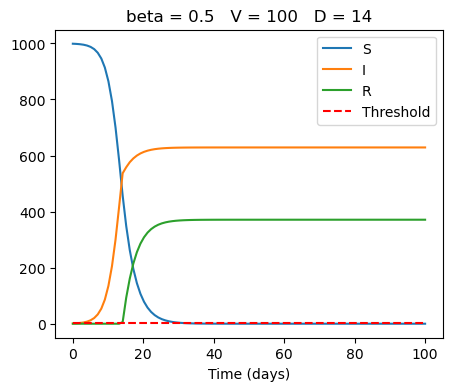

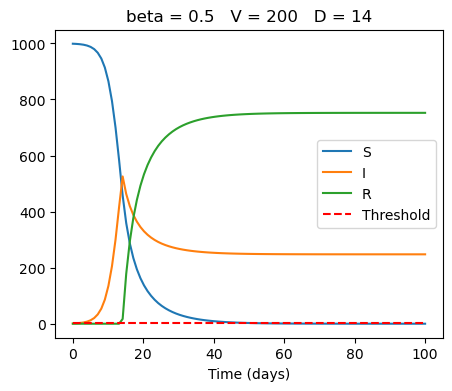

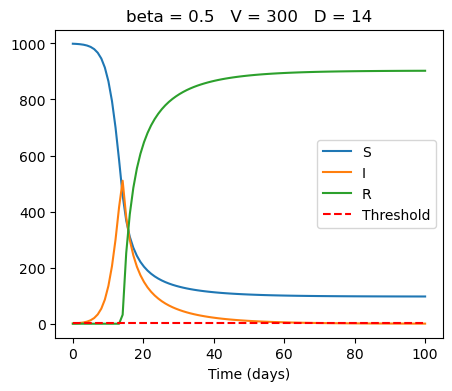

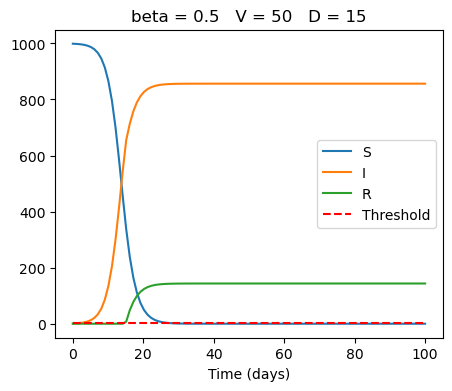

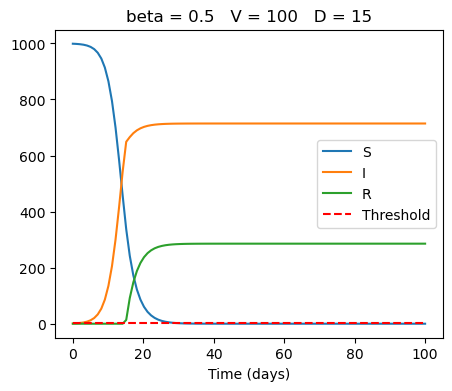

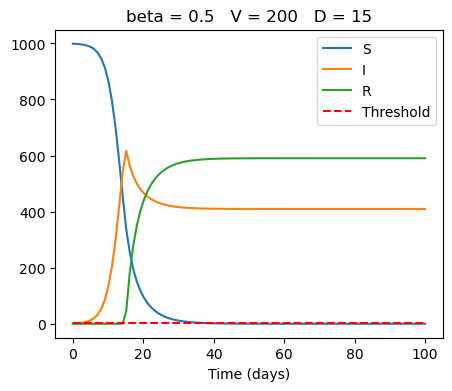

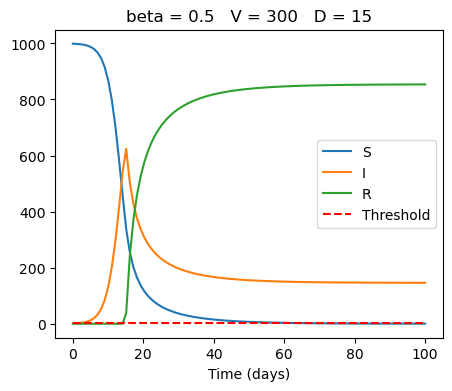

In [143]:
list_V = [50, 100, 200, 300]

for day_D in days_D:
    for max_V in list_V:
        sir_int = solve_ivp(fun = mySIR, t_span = interval, y0 = sir_0, args = (beta, mu, pop_N, max_V, day_D), t_eval = np.linspace(interval[0],interval[1], timesteps))
        sir_int.y

        # Plot the curves
        fig, ax = plt.subplots(dpi = 100, figsize = (5,4))
        curves = ax.plot(sir_int.t, sir_int.y.T, label = ['S', 'I', 'R'])
        threshold = ax.plot(sir_int.t, [1]*len(sir_int.t), "r--", label = "Threshold")
        ax.set_title("beta = {}   V = {}   D = {}".format(beta, max_V, day_D))
        ax.set_xlabel("Time (days)")
        ax.legend()